In [1]:
%matplotlib inline
# TensorFlow and tf.keras
import tensorflow as tf
from time import time
from collections import Counter
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
plt.interactive(False)
print(tf.__version__)


print("imported...")

'''
This program uses simle ANN model to train the image data. 
1. It loads the labless.xls file and imports images (gray scale) & classes
2. resize the images to a particular width and height
3. This mdoel, did not produce better accuracy. 
4. USE CNN model instead.. 

'''


1.12.0
imported...


In [2]:
df=pd.read_excel('Lables.xlsx')
print("file loaded")

fan= df["Fan"]
major= df["Major"]
minor=df["Minor"]
good=df["Good"]
other=df["Other"]
name=df["Photo Name"]


### create the train lables (0-good,1-minor,2-major, 3-other, 4-fan)
class_names=[ "good","minor", "major","other"]
num_images=name.size
lables=[]

##TODO: The fan class can be =4, when we will do multi lableing. 
for i in range(num_images):
    lables.insert(i, 3) #by default other.
    if(good[i]==1):
        lables.insert(i,0)
    elif(minor[i]==1):
        lables.insert(i,1)
    elif(major[i]==1):
        lables.insert(i,2)
print("images labled...")

file loaded
images labled...


In [3]:
## load the image data in the memory
#img_path="C:\\Users\212628414\Desktop\Rotation3\demo_codes\image_processing\";
img_data=[]
for i in range(num_images):
    img= cv2.imread("C:\\Users\\212628414\\Desktop\\Rotation3\\demo_codes\\image_processing\\jupyter\\image_data\\"+name[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_data.insert(i, gray)
    print("added...:"+str(name[i])+"->"+ str(gray.shape))
print("image data loaded.....")


added...:ABC1.jpg->(4032, 3024)
added...:337898F6-683C-42D8-BB90-059668CAAAC5_BW.jpeg->(4032, 3024)
added...:3AEC621C-354A-42C4-909E-5737795064AD_BW.jpeg->(4032, 3024)
added...:6C7EF891-9714-43A2-A5E3-831B17C2A9B9_BW.jpeg->(4032, 3024)
added...:7064D1C3-6496-442D-9CAF-CD4886189553_BW.jpeg->(4032, 3024)
added...:975521CA-E150-48AE-8308-511D3CD23FAC_BW.jpeg->(3024, 4032)
added...:9B4FD5A8-03C6-42AC-8BB2-47F26CA76C35_BW.jpeg->(4032, 3024)
added...:AE68848B-5965-4770-8B1B-5694A7AF7A97_BW.jpeg->(4032, 3024)
added...:BFF344B7-61EC-45F8-BF8F-72753CA2620F_BW.jpeg->(4032, 3024)
added...:E5D4F837-D3B1-48D1-A234-FEC16ADB63AF_BW.jpeg->(4032, 3024)
added...:EA7663D6-8BAD-4B41-88D1-5D19D3CC893D_BW.jpeg->(4032, 3024)
added...:F59C47A3-AB93-4DF5-BFBA-EB70DAF43E10_BW.jpeg->(4032, 3024)
added...:FB46976C-C819-477F-B8D6-699ADEC79E73_BW.jpeg->(4032, 3024)
added...:IMG_0103_BW.JPG->(4032, 3024)
added...:IMG_0104_BW.JPG->(4032, 3024)
added...:IMG_0105_BW.JPG->(4032, 3024)
added...:IMG_0106_BW.JPG->(4032, 30

added...:IMG_0292_BW.JPG->(3024, 3024)
added...:IMG_0293_BW.JPG->(3024, 3024)
added...:IMG_0294_BW.JPG->(3024, 3024)
added...:IMG_0295_BW.JPG->(3024, 3024)
added...:IMG_0296_BW.JPG->(3024, 3024)
added...:IMG_0297_BW.JPG->(3024, 3024)
added...:IMG_0298_BW.JPG->(3024, 3024)
added...:IMG_0299_BW.JPG->(3024, 3024)
added...:IMG_0300_BW.JPG->(3024, 3024)
added...:IMG_0301_BW.JPG->(3024, 3024)
added...:IMG_0302_BW.JPG->(3024, 3024)
added...:IMG_0303_BW.JPG->(3024, 3024)
added...:IMG_0304_BW.JPG->(3024, 3024)
added...:IMG_0305_BW.JPG->(3024, 3024)
added...:IMG_0306_BW.JPG->(3024, 3024)
added...:IMG_0307_BW.JPG->(3024, 3024)
added...:IMG_0308_BW.JPG->(3024, 3024)
added...:IMG_0309_BW.JPG->(3024, 3024)
added...:IMG_0310_BW.JPG->(3024, 3024)
added...:IMG_0311_BW.JPG->(3024, 3024)
added...:IMG_0312_BW.JPG->(3024, 3024)
added...:IMG_0313_BW.JPG->(3024, 3024)
added...:IMG_0314_BW.JPG->(3024, 3024)
added...:IMG_0315_BW.JPG->(3024, 3024)
added...:IMG_0316_BW.JPG->(3024, 3024)
added...:IMG_0317_BW.JPG-

added...:IMG_0503_BW.JPG->(3024, 3024)
added...:IMG_0504_BW.JPG->(3024, 3024)
added...:IMG_0505_BW.JPG->(3024, 3024)
added...:IMG_0506_BW.JPG->(3024, 3024)
added...:IMG_0507_BW.JPG->(3024, 3024)
added...:IMG_0508_BW.JPG->(3024, 3024)
added...:IMG_0509_BW.JPG->(3024, 3024)
added...:IMG_0510_BW.JPG->(3024, 3024)
added...:IMG_0511_BW.JPG->(3024, 3024)
added...:IMG_0512_BW.JPG->(3024, 3024)
added...:IMG_0513_BW.JPG->(3024, 3024)
added...:IMG_0624_BW.JPG->(3024, 3024)
added...:IMG_0635_BW.JPG->(4032, 3024)
added...:IMG_0636_BW.JPG->(4032, 3024)
added...:IMG_0637_BW.JPG->(4032, 3024)
added...:IMG_0638_BW.JPG->(3024, 4032)
added...:IMG_0639_BW.JPG->(3024, 4032)
added...:IMG_0640_BW.JPG->(3024, 4032)
added...:IMG_0641_BW.JPG->(3024, 4032)
added...:IMG_0642_BW.JPG->(3024, 4032)
added...:IMG_0643_BW.JPG->(3024, 4032)
added...:IMG_0644_BW.JPG->(3024, 4032)
added...:IMG_0645_BW.JPG->(3024, 4032)
added...:IMG_0646_BW.JPG->(4032, 3024)
added...:IMG_0647_BW.JPG->(4032, 3024)
added...:IMG_0648_BW.JPG-

added...:121_GW.jpg->(4032, 3024)
added...:122_GW.jpg->(4032, 3024)
added...:123_GW.jpg->(4032, 3024)
added...:124_GW.jpg->(3024, 4032)
added...:125_GW.jpg->(3024, 4032)
added...:126_GW.jpg->(3024, 4032)
added...:127_GW.jpg->(3024, 4032)
added...:128_GW.jpg->(3024, 4032)
added...:129_GW.jpg->(3024, 4032)
added...:130_GW.jpg->(4032, 3024)
added...:131_GW.jpg->(4032, 3024)
added...:132_GW.jpg->(4032, 3024)
added...:133_GW.jpg->(3024, 4032)
added...:134_GW.jpg->(4032, 3024)
added...:135_GW.jpg->(3024, 4032)
added...:136_GW.jpg->(3024, 4032)
added...:137_GW.jpg->(4032, 3024)
added...:138_GW.jpg->(4032, 3024)
added...:139_GW.jpg->(3024, 4032)
added...:140_GW.jpg->(3024, 4032)
added...:141_GW.jpg->(3024, 4032)
added...:142_GW.jpg->(4032, 3024)
added...:143_GW.jpg->(3024, 4032)
added...:144_GW.jpg->(4032, 3024)
added...:145_GW.jpg->(4032, 3024)
added...:146_GW.jpg->(4032, 3024)
added...:147_GW.jpg->(4032, 3024)
added...:148_GW.jpg->(3024, 4032)
added...:149_GW.jpg->(4032, 3024)
added...:150_G

In [6]:
## convert the image data into ndArray and equal shapes by augmenting the data. 
height=800
width=800

data_list=[]
for i in range(num_images):
    tmp_img= img_data[i]
    tmp2_img= cv2.resize(img_data[i], (width,height)) 
    data_list.insert(i, tmp2_img)
data=np.asarray(data_list)
print("image data resized and stored.......")
data.shape
    

image data resized and stored.......


(768, 800, 800)

In [7]:
##prepare the training testing and validation data
train_size=600
test_size=100
val_size=50
train_data=data[0:train_size,:,:]
test_data=data[train_size+1:train_size+test_size:,:]
val_data=data[train_size+test_size+1:train_size+test_size+val_size,:,:]

train_lables=lables[0:train_size]
test_lables=lables[train_size+1:train_size+test_size]
val_lables=lables[train_size+test_size+1:train_size+test_size+val_size]

print("train, test, val data prepared....")



train, test, val data prepared....


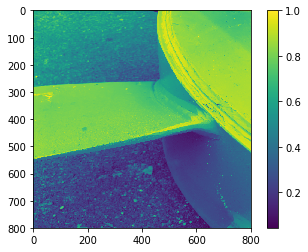

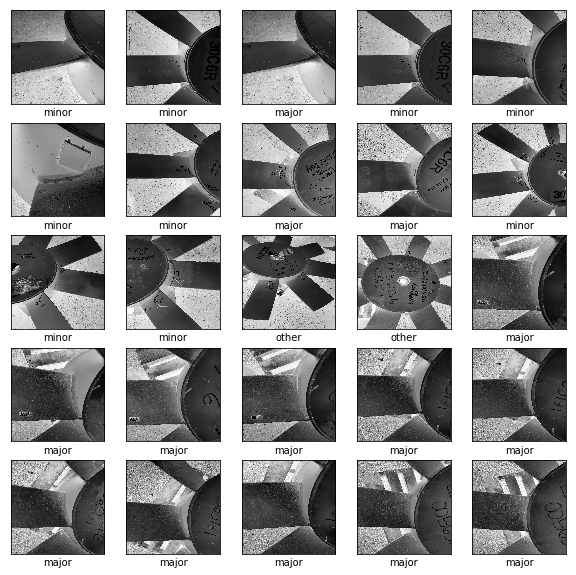

done...1


In [30]:
train_data = train_data
test_data = test_data

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])

plt.show()
print("done...1")

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(width, height)),
    keras.layers.Dense(256, activation=tf.nn.relu),  
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("model Compiled..") 

model Compiled..


In [32]:
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
model.fit(train_data, train_lables, epochs=5, callbacks=[tensorboard])
print("Model Trained...")

Epoch 1/5
600/600 [==============================] - 41s 68ms/step - loss: 9.8759 - acc: 0.3467
Epoch 2/5
600/600 [==============================] - 32s 54ms/step - loss: 10.2081 - acc: 0.3667
Epoch 3/5
600/600 [==============================] - 37s 61ms/step - loss: 10.2081 - acc: 0.3667
Epoch 4/5
600/600 [==============================] - 29s 48ms/step - loss: 10.2081 - acc: 0.3667
Epoch 5/5
600/600 [==============================] - 35s 58ms/step - loss: 10.2081 - acc: 0.3667
Model Trained...


In [41]:
#eval=model.predict_classes(test_data,batch_size=10, verbose=1)
#print(eval)



[1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[(1, 220), (2, 189), (3, 96), (0, 95)]